# Stock Data Pull and Plot

This code is meant to pull stock data and plot using matplotlib.

How it works:
1. Run the program  
2. Input the desired tickers  
3. Output is a plot of the performance of those tickers in % for the year 2020

In [130]:
# Import modules
import yfinance as yf # https://pypi.org/project/yfinance/
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from datetime import datetime
import pandas as pd

In [131]:
print('''
For the primary indices, you can use the following tickers:
-SP500
-DJI
-NASDAQ
-RUSSELL
''')


For the primary indices, you can use the following tickers:
-SP500
-DJI
-NASDAQ
-RUSSELL



In [132]:
# User provides list
tickers = []
answer = 'Y'
while answer == 'Y':
    print('-'*64)
    ticker = input('Which ticker would you like to look at? :')
    if ticker == 'SP500':
        ticker = '^GSPC'
    elif ticker == 'DJI':
        ticker = '^DJI'
    elif ticker == 'NASDAQ':
        ticker = '^IXIC'
    elif ticker == 'RUSSELL':
        ticker = '^RUT'
    tickers.append(ticker)
    answer = input('Would you like to enter another ticker? (Y/N):')

----------------------------------------------------------------
Which ticker would you like to look at? :SP500
Would you like to enter another ticker? (Y/N):Y
----------------------------------------------------------------
Which ticker would you like to look at? :DJI
Would you like to enter another ticker? (Y/N):Y
----------------------------------------------------------------
Which ticker would you like to look at? :NASDAQ
Would you like to enter another ticker? (Y/N):Y
----------------------------------------------------------------
Which ticker would you like to look at? :RUSSELL
Would you like to enter another ticker? (Y/N):N


In [133]:
# create empty dataframe which the code will append
df = pd.DataFrame()

# primary loop for pulling data, doing calculations, and merging dataframes
for x in tickers:
    start_date="2020-01-01"
    end_date="2021-01-01"
    data = yf.download(x, start=start_date, end=end_date)
    if x == '^GSPC':
        filename='SP500'
    elif x == '^DJI':
        filename='DJI'
    elif x == '^IXIC':
        filename='NASDAQ'
    elif x == '^RUT':
        filename='RUSSELL'
    elif any(not char.isalnum() for char in x):
        filename=''.join(char for char in x if char.isalnum())
    else:
        filename = x
    data.to_csv(f'Output/stock_data_{filename}.csv')  # data checkpoint1
    try:
        data[f'{filename}'] = (data['Close']-data['Close'][0])/data['Close'][0]*100
        data = data.drop(columns=['Open','High','Low','Close','Adj Close','Volume'])
        df = pd.concat([df,data],axis=1)
    except:
        print(f"Unable to process {ticker}, Yahoo Finance was probably unable to find this ticker.")

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


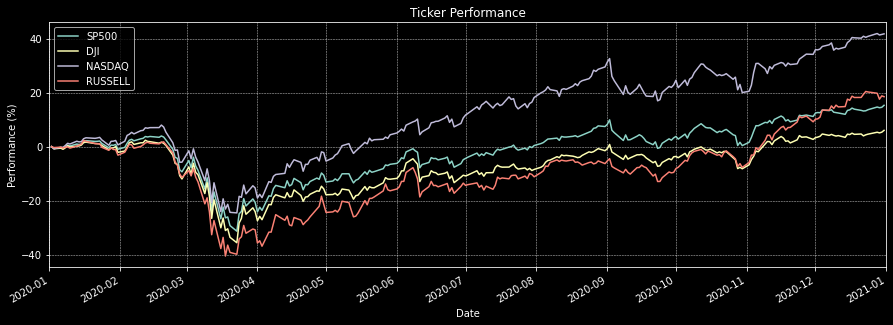

In [134]:
# Convert start and end date to datetime for plotting purposes
start_date_obj = datetime.strptime(start_date, '%Y-%m-%d')
end_date_obj = datetime.strptime(end_date, '%Y-%m-%d')

# Plot tickers v performance
ax = df.plot.line(figsize=(15,5),title='Ticker Performance',ylabel='Performance (%)')
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=1))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.xlim(start_date_obj,end_date_obj)
plt.grid(color='white',linestyle='--',linewidth=0.5,alpha=0.8)
plt.show()